<a href="https://colab.research.google.com/github/yerinsally/2022_PythonML/blob/main/team_G(12_02).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 데이터 불러오기 & 데이터셋 나누기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/data/breast-cancer-wisconsin.csv', encoding='utf-8')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   code                         683 non-null    int64
 1   Clump_Thickness              683 non-null    int64
 2   Cell_Size                    683 non-null    int64
 3   Cell_Shape                   683 non-null    int64
 4   Marginal_Adhesion            683 non-null    int64
 5   Single_Epithelial_Cell_Size  683 non-null    int64
 6   Bare_Nuclei                  683 non-null    int64
 7   Bland_Chromatin              683 non-null    int64
 8   Normal_Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [ ]:
data.isnull().sum()

code                           0
Clump_Thickness                0
Cell_Size                      0
Cell_Shape                     0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [ ]:
data['Class'].unique()

array([0, 1])

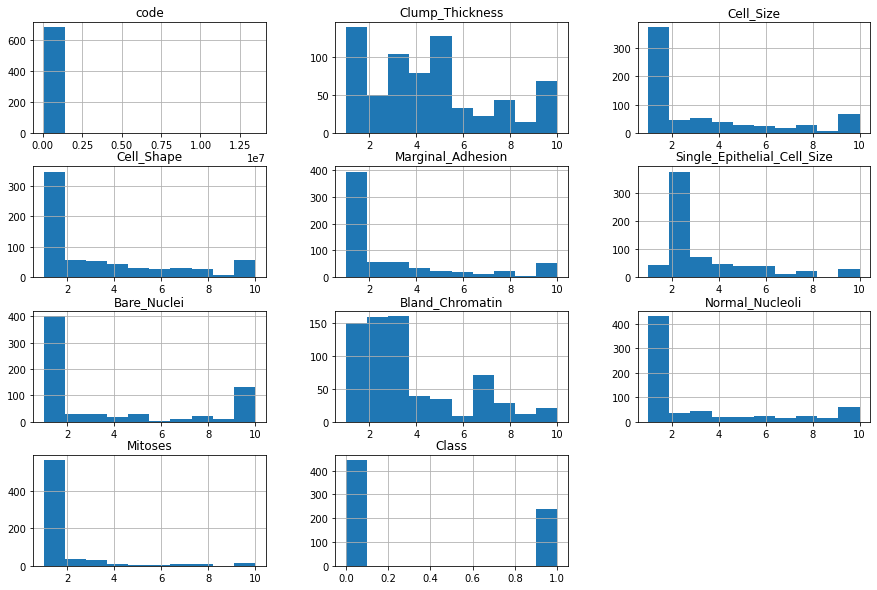

In [ ]:
data.hist(figsize=(15,10));

In [ ]:
X = data.iloc[:,1:10]
y = data['Class']

### Standardization 스케일링 적용

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
pd.DataFrame(X_scaled).describe() # 정규분포로 정규화

,0,1,2,3,4,5,6,7,8
count,6.830000e+02,683.000000,6.830000e+02,6.830000e+02,6.830000e+02,683.000000,6.830000e+02,6.830000e+02,6.830000e+02
mean,1.144359e-16,0.000000,-6.241957e-17,4.681468e-17,-2.080652e-17,0.000000,3.120978e-17,2.080652e-17,3.120978e-17
std,1.000733e+00,1.000733,1.000733e+00,1.000733e+00,1.000733e+00,1.000733,1.000733e+00,1.000733e+00,1.000733e+00
min,-1.221191e+00,-0.702212,-7.417736e-01,-6.393655e-01,-1.005763e+00,-0.698853,-9.988531e-01,-6.129274e-01,-3.483997e-01
25%,-8.664174e-01,-0.702212,-7.417736e-01,-6.393655e-01,-5.556085e-01,-0.698853,-5.903401e-01,-6.129274e-01,-3.483997e-01
50%,-1.568693e-01,-0.702212,-7.417736e-01,-6.393655e-01,-5.556085e-01,-0.698853,-1.818272e-01,-6.129274e-01,-3.483997e-01
75%,5.526787e-01,0.603740,5.976352e-01,4.086824e-01,3.447014e-01,0.674325,6.351988e-01,3.705403e-01,-3.483997e-01
max,1.971775e+00,2.236180,2.271896e+00,2.504778e+00,3.045631e+00,1.772867,2.677764e+00,2.337476e+00,4.849690e+00


In [ ]:
# X_scaled.columns=['Clump_Thickness','Cell_Size','Cell_Shape', 'Marginal_Adhesion','Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin','Normal_Nucleoli', 'Mitoses']

In [ ]:
# train / test 데이터셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, stratify=y, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(512, 9) (171, 9) (512,) (171,)


## 2. 의사결정나무

### Grid Search 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid={'max_depth': range(2,20,1),'min_samples_leaf': range(1,50,1)}

grid_search=GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 20),
                         'min_samples_leaf': range(1, 50)},
             return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Best Parameter: {'max_depth': 7, 'min_samples_leaf': 1}
Best Cross-validity Score: 0.967
Test set Score: 0.959


In [ ]:
result_grid = pd.DataFrame(grid_search.cv_results_)

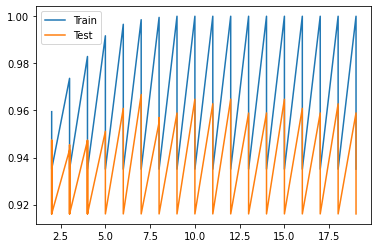

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_max_depth'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_max_depth'], result_grid['mean_test_score'], label="Test")
plt.legend()

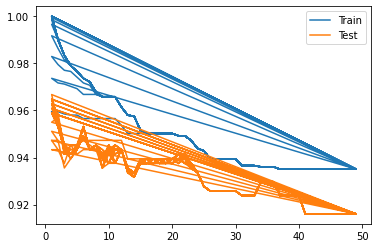

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_min_samples_leaf'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_min_samples_leaf'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
param_distribs = {'max_depth': randint(low=1, high=20), 
                  'min_samples_leaf': randint(low=1, high=50)}

In [ ]:
random_search=RandomizedSearchCV(DecisionTreeClassifier(), 
                                 param_distributions=param_distribs, cv=5, return_train_score=True)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f15fd643670>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f15f5440a60>},
                   return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Best Parameter: {'max_depth': 12, 'min_samples_leaf': 5}
Best Cross-validity Score: 0.945
Test set Score: 0.924


In [ ]:
result_random = random_search.cv_results_
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002273,0.000710,0.000925,0.000441,16,12,"{'max_depth': 16, 'min_samples_leaf': 12}",0.951456,0.932039,0.941176,...,0.943366,0.007229,2,0.955990,0.948655,0.965854,0.960976,0.975610,0.961417,0.009095
1,0.002462,0.000604,0.000650,0.000206,12,39,"{'max_depth': 12, 'min_samples_leaf': 39}",0.912621,0.902913,0.941176,...,0.923891,0.018691,8,0.933985,0.941320,0.931707,0.929268,0.939024,0.935061,0.004491
2,0.001160,0.000119,0.000398,0.000025,10,42,"{'max_depth': 10, 'min_samples_leaf': 42}",0.912621,0.902913,0.941176,...,0.916048,0.028029,10,0.933985,0.941320,0.931707,0.929268,0.939024,0.935061,0.004491
3,0.001596,0.000488,0.000779,0.000365,8,24,"{'max_depth': 8, 'min_samples_leaf': 24}",0.951456,0.932039,0.941176,...,0.933562,0.011560,5,0.955990,0.946210,0.931707,0.931707,0.953659,0.943855,0.010431
4,0.001863,0.000284,0.000658,0.000132,15,19,"{'max_depth': 15, 'min_samples_leaf': 19}",0.951456,0.932039,0.950980,...,0.939444,0.011443,4,0.955990,0.948655,0.946341,0.946341,0.953659,0.950197,0.003941
5,0.001212,0.000066,0.000419,0.000023,8,30,"{'max_depth': 8, 'min_samples_leaf': 30}",0.941748,0.902913,0.941176,...,0.925795,0.014494,7,0.938875,0.941320,0.931707,0.931707,0.953659,0.939454,0.008070
6,0.001339,0.000177,0.000434,0.000070,7,11,"{'max_depth': 7, 'min_samples_leaf': 11}",0.951456,0.932039,0.941176,...,0.943366,0.007229,2,0.963325,0.963325,0.965854,0.960976,0.975610,0.965818,0.005133
7,0.001106,0.000097,0.000403,0.000063,12,31,"{'max_depth': 12, 'min_samples_leaf': 31}",0.941748,0.902913,0.941176,...,0.923834,0.015557,9,0.938875,0.941320,0.931707,0.931707,0.939024,0.936527,0.004030
8,0.001247,0.000063,0.000413,0.000019,12,5,"{'max_depth': 12, 'min_samples_leaf': 5}",0.961165,0.902913,0.960784,...,0.945365,0.022561,1,0.970660,0.977995,0.975610,0.980488,0.978049,0.976560,0.003329
9,0.001107,0.000026,0.000381,0.000018,7,24,"{'max_depth': 7, 'min_samples_leaf': 24}",0.951456,0.932039,0.941176,...,0.933562,0.011560,5,0.955990,0.946210,0.931707,0.931707,0.953659,0.943855,0.010431


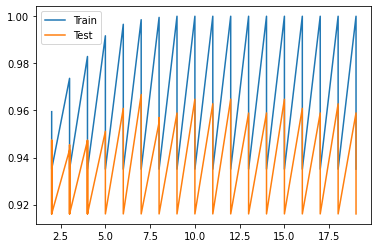

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_max_depth'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_max_depth'], result_grid['mean_test_score'], label="Test")
plt.legend()

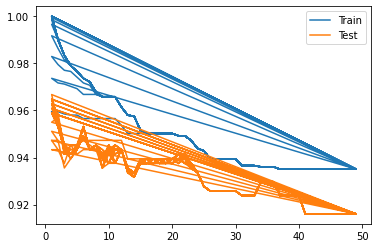

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_min_samples_leaf'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_min_samples_leaf'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

### 모델평가

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_train = dt.predict(X_train)
pred_test = dt.predict(X_test)
print('Train 정확도:',accuracy_score(y_train, pred_train))
print('Test 정확도:',accuracy_score(y_test, pred_test))

Train 정확도: 1.0
Test 정확도: 0.9532163742690059


In [ ]:
max_depth_list = range(1,20)
train_list=[]
test_list=[]
for max_depth in max_depth_list:
  tree = DecisionTreeClassifier(max_depth = max_depth)
  tree.fit(X_train, y_train)
  pre_train = tree.predict(X_train)
  pred_test = tree.predict(X_test)
  train_list.append(accuracy_score(y_train, pred_train))
  test_list.append(accuracy_score(y_test, pred_test))

d = {
    "max_depth":max_depth_list,
     "Train 정확도":train_list,
     "Test 정확도":test_list
}
acc_df = pd.DataFrame(d)
acc_df

,max_depth,Train 정확도,Test 정확도
0,1,1.0,0.900585
1,2,1.0,0.941520
2,3,1.0,0.953216
3,4,1.0,0.953216
4,5,1.0,0.929825
5,6,1.0,0.964912
6,7,1.0,0.964912
7,8,1.0,0.964912
8,9,1.0,0.953216
9,10,1.0,0.959064


In [ ]:
tree=DecisionTreeClassifier(max_depth=17, min_samples_leaf=3)

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=17, min_samples_leaf=3)

In [ ]:
from sklearn.metrics import confusion_matrix
pred_train=tree.predict(X_train)
confusion_train=confusion_matrix(y_train, pred_train)
pred_test=tree.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("훈련데이터 오차행렬:\n", confusion_train)
print("테스트 데이터 오차행렬:\n", confusion_test)

훈련데이터 오차행렬:
 [[329   4]
 [  3 176]]
테스트 데이터 오차행렬:
 [[106   5]
 [  2  58]]


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
f1=f1_score(y_test, pred_test)
print("f1_score =", f1,"\n")
cfreport=classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport)

f1_score = 0.943089430894309 

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       111
           1       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.01894562 0.04248937 0.78428789 0.01508025 0.00804986 0.12880447
 0.00234255 0.         0.        ]


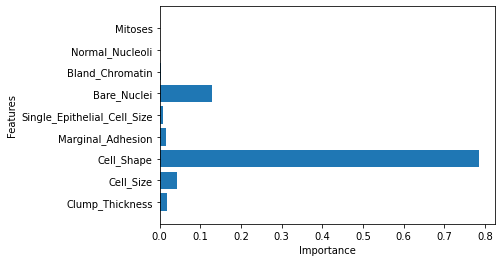

In [ ]:
import numpy as np
def plot_feature_importances_tree(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances_tree(tree)

변수중요도 : cell_shape - Bare_Nuclei - cell_size

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
tree=DecisionTreeClassifier(max_depth=17, min_samples_leaf=6)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=17, min_samples_leaf=6)

In [ ]:
!pip install graphviz
# graphvis 설치가 제대로 되지 않을 경우 아래에서 직접 설치
# https://graphviz.gitlab.io/_pages/Download/windows/graphviz-2.38.msi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=['0', '1'],
                feature_names=X.columns, impurity=False, filled=True)

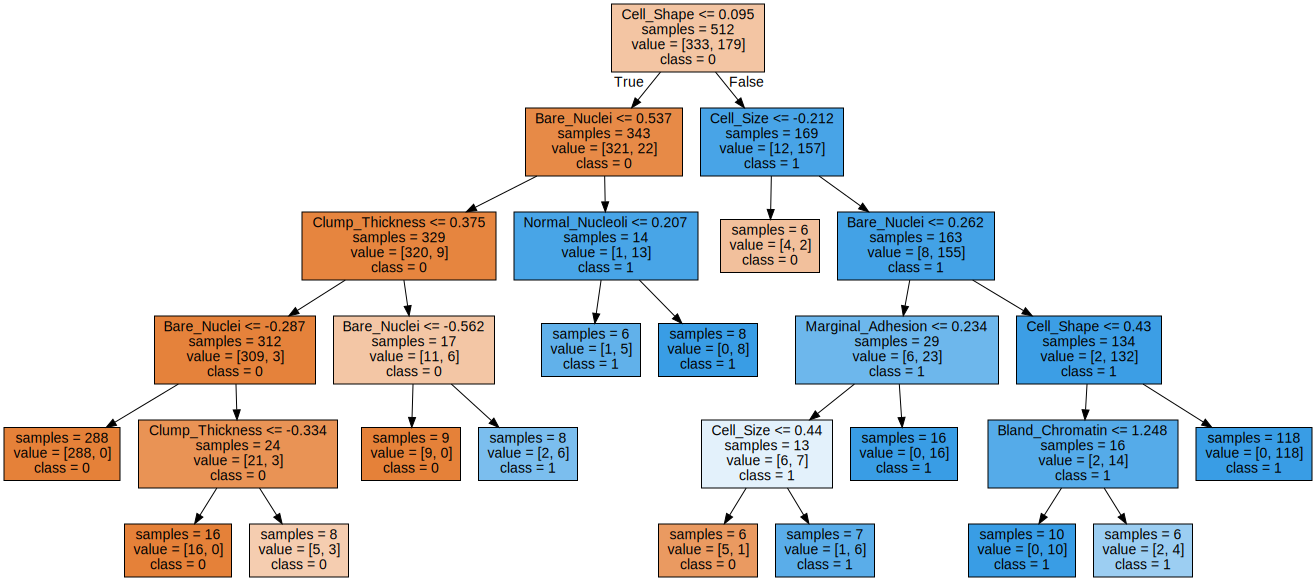

In [ ]:
with open("tree.dot", encoding ="euc-kr") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

## 3. KNN

### Grid Search

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid={'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
grid_search=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(grid_search.best_params_))
# test_size = 0.6 일 때는 6
# 0.5 일 때는 8
# 0.4 일 때 8
# 0.3 일 때 4 
# 0.25 일 때 3
# 0.2 일 때 6

Best Parameter: {'n_neighbors': 3}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))
# test_size = 0.6 일 때는 0.836
# 0.5 일 때는 0.835
# 0.4 일 때 0.842
# 0.3 일 때 0.837 
# 0.25 일 때 0.842
# 0.2 일 때 0.839

Best Cross-validity Score: 0.982


In [ ]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))
# test_size = 0.6 일 때는 0.827
# 0.5 일 때는 0.825
# 0.4 일 때 0.822
# 0.3 일 때 0.809 
# 0.25 일 때 0.816
# 0.2 일 때 0.81

Test set Score: 0.942


In [ ]:
result_grid= pd.DataFrame(grid_search.cv_results_)

### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
param_distribs = {'n_neighbors': randint(low=1, high=20)}
random_search=RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_distribs, cv=5, return_train_score=True)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f15fd5d18e0>},
                   return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Best Parameter: {'n_neighbors': 8}
Best Cross-validity Score: 0.977
Test set Score: 0.953


In [ ]:
result_random = random_search.cv_results_
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016916,0.006310,0.026234,0.010805,7,{'n_neighbors': 7},0.990291,0.980583,0.970588,0.980392,...,0.974567,0.013338,2,0.977995,0.977995,0.980488,0.980488,0.985366,0.980466,0.002691
1,0.004083,0.002728,0.030297,0.012510,2,{'n_neighbors': 2},1.000000,0.990291,0.950980,0.950980,...,0.960803,0.031634,8,0.968215,0.970660,0.973171,0.985366,0.982927,0.976068,0.006823
2,0.004057,0.003737,0.017390,0.008511,19,{'n_neighbors': 19},0.990291,0.980583,0.970588,0.970588,...,0.972606,0.013055,4,0.968215,0.968215,0.973171,0.968293,0.980488,0.971676,0.004802
3,0.004660,0.004928,0.024188,0.010230,19,{'n_neighbors': 19},0.990291,0.980583,0.970588,0.970588,...,0.972606,0.013055,4,0.968215,0.968215,0.973171,0.968293,0.980488,0.971676,0.004802
4,0.005032,0.003751,0.016924,0.007774,15,{'n_neighbors': 15},0.990291,0.990291,0.970588,0.970588,...,0.974548,0.014714,3,0.968215,0.968215,0.973171,0.973171,0.978049,0.972164,0.003684
5,0.001901,0.000199,0.015038,0.007332,2,{'n_neighbors': 2},1.000000,0.990291,0.950980,0.950980,...,0.960803,0.031634,8,0.968215,0.970660,0.973171,0.985366,0.982927,0.976068,0.006823
6,0.002794,0.001666,0.014810,0.004028,13,{'n_neighbors': 13},0.990291,0.980583,0.970588,0.970588,...,0.972606,0.013055,4,0.970660,0.968215,0.973171,0.973171,0.985366,0.974117,0.005918
7,0.002713,0.001629,0.008441,0.000814,12,{'n_neighbors': 12},0.990291,0.990291,0.970588,0.970588,...,0.972587,0.018008,7,0.968215,0.968215,0.975610,0.973171,0.982927,0.973628,0.005463
8,0.001825,0.000089,0.007702,0.000985,8,{'n_neighbors': 8},0.990291,0.990291,0.970588,0.980392,...,0.976509,0.014709,1,0.973105,0.973105,0.978049,0.978049,0.982927,0.977047,0.003678
9,0.003329,0.002970,0.011097,0.005984,2,{'n_neighbors': 2},1.000000,0.990291,0.950980,0.950980,...,0.960803,0.031634,8,0.968215,0.970660,0.973171,0.985366,0.982927,0.976068,0.006823


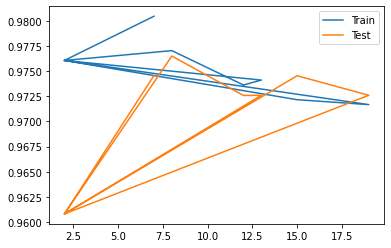

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_random['param_n_neighbors'], result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_n_neighbors'], result_random['mean_test_score'], label="Test")
plt.legend()

### 모델평가

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_best=KNeighborsClassifier(n_neighbors=8)

In [ ]:
knn_best.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix
# Confusion matrix에서
pred_train=knn_best.predict(X_train) 
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[330   3]
 [  8 171]]


In [ ]:
pred_test=knn_best.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)


테스트데이터 오차행렬:
 [[106   5]
 [  3  57]]


In [ ]:
f1=f1_score(y_test, pred_test)
print("f1 score:", f1,'\n')
from sklearn.metrics import classification_report
cfreport=classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport)

f1 score: 0.9344262295081968 

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       111
           1       0.92      0.95      0.93        60

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
# test_size =
# 0.6 일 때 f1 = 0.59 / 0.89
# 0.5 일 때 f1 = 0.56 / 0.89
# 0.4 일 때 f1 = 0.55 / 0.89
# 0.3 일 때 f1 = 0.57 / 0.88
# 0.25 일 때 f1 = 0.54 / 0.88
# 0.2 일 때 f1 = 0.51 / 0.88

## 4. 랜덤포레스트

### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators': range(100, 1000, 100), 
            'max_features': ['auto', 'sqrt', 'log2']}
from sklearn.ensemble import RandomForestClassifier
grid_search=GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Best Parameter: {'max_features': 'auto', 'n_estimators': 300}
Best Cross-validity Score: 0.971
Test set Score: 0.965


In [ ]:
result_grid= pd.DataFrame(grid_search.cv_results_)

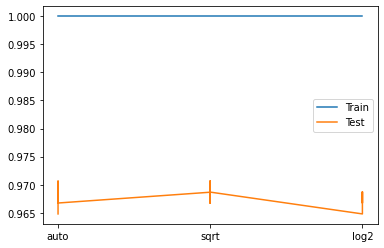

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_max_features'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_max_features'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

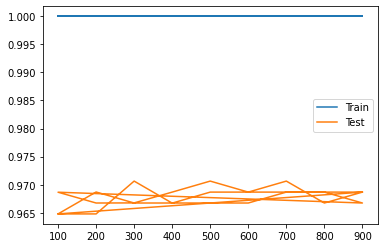

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
param_distribs = {'n_estimators': randint(low=100, high=1000), 
                  'max_features': ['auto', 'sqrt', 'log2']}

In [ ]:
random_search=RandomizedSearchCV(RandomForestClassifier(), 
                                 param_distributions=param_distribs, cv=5, return_train_score=True)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f15f53917c0>},
                   return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Best Parameter: {'max_features': 'log2', 'n_estimators': 583}
Best Cross-validity Score: 0.971
Test set Score: 0.965


In [ ]:
result_random = random_search.cv_results_
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.471933,0.036291,0.150573,0.077000,sqrt,955,"{'max_features': 'sqrt', 'n_estimators': 955}",0.990291,0.970874,0.970588,...,0.966743,0.014719,8,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.966879,0.135738,0.064319,0.002683,log2,583,"{'max_features': 'log2', 'n_estimators': 583}",0.990291,0.980583,0.980392,...,0.970645,0.016451,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.890893,0.009765,0.067184,0.006120,sqrt,571,"{'max_features': 'sqrt', 'n_estimators': 571}",0.990291,0.980583,0.970588,...,0.968685,0.015741,5,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.705788,0.016394,0.052104,0.002551,sqrt,459,"{'max_features': 'sqrt', 'n_estimators': 459}",0.990291,0.980583,0.970588,...,0.968685,0.015741,5,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,1.050357,0.039563,0.082045,0.010584,log2,661,"{'max_features': 'log2', 'n_estimators': 661}",0.990291,0.970874,0.980392,...,0.968704,0.015720,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,1.397949,0.060869,0.103224,0.005852,log2,900,"{'max_features': 'log2', 'n_estimators': 900}",0.990291,0.980583,0.970588,...,0.968685,0.015741,5,1.0,1.0,1.0,1.0,1.0,1.0,0.0
6,1.415927,0.114331,0.108622,0.012695,log2,885,"{'max_features': 'log2', 'n_estimators': 885}",0.990291,0.970874,0.970588,...,0.966743,0.014719,8,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7,2.149398,0.521977,0.124849,0.029621,sqrt,931,"{'max_features': 'sqrt', 'n_estimators': 931}",0.990291,0.980583,0.980392,...,0.970645,0.016451,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
8,0.878398,0.009939,0.064181,0.006089,sqrt,575,"{'max_features': 'sqrt', 'n_estimators': 575}",0.980583,0.970874,0.970588,...,0.964801,0.011844,10,1.0,1.0,1.0,1.0,1.0,1.0,0.0
9,0.872192,0.034459,0.061955,0.002498,auto,575,"{'max_features': 'auto', 'n_estimators': 575}",0.990291,0.970874,0.980392,...,0.968704,0.015720,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0


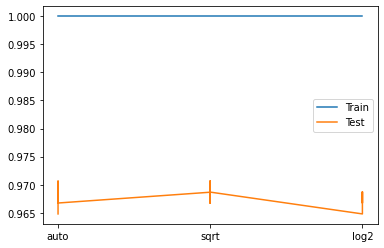

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_max_features'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_max_features'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

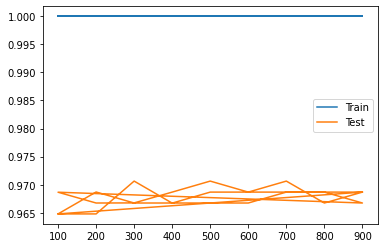

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Forest=RandomForestClassifier(max_features='log2', n_estimators=583)
Forest.fit(X_train, y_train)
print("특성 중요도:\n{}".format(Forest.feature_importances_))

특성 중요도:
[0.04731834 0.19500527 0.25921399 0.02995896 0.09733089 0.21220655
 0.09320475 0.0560263  0.00973495]


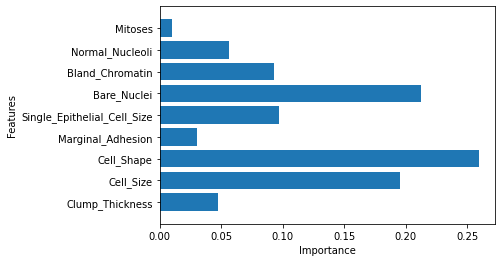

In [ ]:
def plot_feature_importances_forest(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances_forest(Forest)

### 모델평가

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Forest=RandomForestClassifier(max_features='log2', n_estimators=583)
Forest.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix

In [ ]:
pred_train=Forest.predict(X_train)
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[333   0]
 [  0 179]]


In [ ]:
pred_test=Forest.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트 데이터 오차행렬:\n", confusion_test)

테스트 데이터 오차행렬:
 [[106   5]
 [  1  59]]


In [ ]:
from sklearn.metrics import f1_score
f1=f1_score(y_test, pred_test)
print("f1 score:\n", f1)
cfreport=classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport)

f1 score:
 0.9516129032258064
분류예측 레포트:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       111
           1       0.92      0.98      0.95        60

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



## 5. 로지스틱 회귀분석

In [ ]:
features = data[[ 'code', 'Clump_Thickness', 'Cell_Size', 'Cell_Shape',
       'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']]
survival = data['Class']

In [ ]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, survival)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_features, train_labels)

LogisticRegression()

In [ ]:
print(model.score(train_features, train_labels))
print(model.score(test_features, test_labels))
print(model.coef_)

0.9765625
0.9649122807017544
[[-0.31038669  1.06690586  0.75838432  0.82073926  0.71605135  0.28463203
   1.10985974  1.00694075  0.59825338  0.60567946]]


회귀분석/변수 중요도 : Bland_Chromatin - Clump_Thickness - Bare_Nuclei